### PAPER's Figure 11

In [1]:
#############################################
#BASIC PACKAGES
import sys,time,os
from copy import deepcopy as dcopy
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

#############################################
#PATH TO SCRIPTS FOLDER
path = '/data/AMARINS/CMBWLxHI-CODES/scripts/'
sys.path.insert(1, path)
import cross_functions_theory      as cxft
import cross_functions_simulations as cxfs
# it's required healpy  (https://healpy.readthedocs.io/en/latest/index.html)
import healpy        as hp
import handling_data as hdata

#############################################
## MATPLOTLIB FEATURES
from matplotlib import cm
font = {'weight' : 'bold','size'   : 22}
mpl.rc('font', **font)
mpl.rc('font',   size=209)  #set defaults so that the plots are readable
mpl.rc('axes',   titlesize=20)
mpl.rc('axes',   labelsize=20)
mpl.rc('xtick',  labelsize=20)
mpl.rc('ytick',  labelsize=20)
mpl.rc('legend', fontsize =20)
mpl.rc('figure', titlesize=20)
mpl.rc('text',   usetex=True)
## FURTHER MATPLOTLIB FEATURES
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.markers import MarkerStyle
from matplotlib.transforms import Affine2D
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
#colors = ["#ffffcc", "#a1dab4", "#41b6c4", "#2c7fb8", "#253494"]
colors = ['darkgrey', '#0000ff', '#ff0000', '#0000FF',  '#FF0000', '#069AF3', '#00008B','#C79FEF','#DC143C','#C875C4','#9A0EEA','darkorange','#C79FEF','#7E1E9C','silver','#FF7F50','#FC5A50',
          '#FFA500','#F97306','#FFD700','#DDA0DD','#00008B','#069AF3','#0000FF','#00FFFF','#13EAC9','#7FFFD4','#04D8B2','#40E0D0']
my_cmap = ListedColormap(colors, name="my_cmap")#mpl.cm.Dark2#.reversed()#
#my_cmap_r = my_cmap.reversed()
font_dict = {'family': 'serif', 'color':  None,  'weight': 'bold','size': 30}
#############################################
## NAMASTER (https://namaster.readthedocs.io/en/latest/)
import pymaster as nmt
del_l  = 20
nside  = 256
##############################
b    = nmt.NmtBin.from_nside_linear(nside, nlb=del_l)
leff = b.get_effective_ells()
feff = leff*(leff+1)/2/np.pi

# LOW-Z

In [2]:
timej  = time.time() 
###
prefix = 'lowz_nch30_980_1260'
dirpath_out = '/data/AMARINS/CMBWLxHI-DATA/postprocessed/fullsky/{}'.format(prefix)
for i,ICs in enumerate(['ns3','ns4','ns5']):   
    dirpath_out_ns = os.path.join(dirpath_out,ICs)
    dirpath_theory = os.path.join(dirpath_out_ns,'theory')
    dirpath_sims   = os.path.join(dirpath_out_ns,'simulations')
    dirpath_rec    = os.path.join(dirpath_out_ns,'estimated')
    dirpath_lkg    = os.path.join(dirpath_out_ns,'leakage')
    dirpath_cross  = os.path.join(dirpath_out_ns,'cross')
    dirpath_alpha  = os.path.join(dirpath_out_ns,'alpha')
    L0_dir         = "sim0"
    
    cl_cx_field1_field2_sim_sim = np.loadtxt(os.path.join(dirpath_sims,L0_dir,       'cl_cx_field1_field2_sim_sim.txt')).T[1:,:]
    cl_cx_field1_field2_rec_sim = np.loadtxt(os.path.join(dirpath_cross, L0_dir, 'cl_cx_field1_field2_rec_sim.txt')).T[1:,:]
    if not i:
        CLs_dict_cmb = {ICs: {'cl_cx_f1_f2_sim_sim':cl_cx_field1_field2_sim_sim,
                              'cl_cx_f1_f2_rec_sim':cl_cx_field1_field2_rec_sim}
                       }
    else:
        CLs_dict_cmb[ICs] = {'cl_cx_f1_f2_sim_sim':cl_cx_field1_field2_sim_sim,
                             'cl_cx_f1_f2_rec_sim':cl_cx_field1_field2_rec_sim
                             }  
    del cl_cx_field1_field2_sim_sim, cl_cx_field1_field2_rec_sim

################################################
prefix = 'lowz_nch30_980_1260_nch25_30'
dirpath_out = '/data/AMARINS/CMBWLxHI-DATA/postprocessed/fullsky/{}'.format(prefix)
for i,ICs in enumerate(['ns3','ns4','ns5']):   
    dirpath_out_ns = os.path.join(dirpath_out,ICs)
    dirpath_theory = os.path.join(dirpath_out_ns,'theory')
    dirpath_sims   = os.path.join(dirpath_out_ns,'simulations')
    dirpath_rec    = os.path.join(dirpath_out_ns,'estimated')
    dirpath_lkg    = os.path.join(dirpath_out_ns,'leakage')
    dirpath_cross  = os.path.join(dirpath_out_ns,'cross')
    dirpath_alpha  = os.path.join(dirpath_out_ns,'alpha')
    L0_dir         = "sim0"
    
    cl_cx_field1_field2_sim_sim = np.loadtxt(os.path.join(dirpath_sims,L0_dir,       'cl_cx_field1_field2_sim_sim.txt')).T[1:,:]
    cl_cx_field1_field2_rec_sim = np.loadtxt(os.path.join(dirpath_cross, L0_dir, 'cl_cx_field1_field2_rec_sim.txt')).T[1:,:]
    if not i:
        CLs_dict_gal = {ICs: {'cl_cx_f1_f2_sim_sim':cl_cx_field1_field2_sim_sim,
                              'cl_cx_f1_f2_rec_sim':cl_cx_field1_field2_rec_sim}
                       }
    else:
        CLs_dict_gal[ICs] = {'cl_cx_f1_f2_sim_sim':cl_cx_field1_field2_sim_sim,
                             'cl_cx_f1_f2_rec_sim':cl_cx_field1_field2_rec_sim
                             }  
    del cl_cx_field1_field2_sim_sim, cl_cx_field1_field2_rec_sim

###
print('Processing time: {0:.4f} seg'.format(time.time()-timej))      

Processing time: 0.0201 seg


In [3]:
########
# CMB
nsims       = 5
ns          = 3
numin,numax= 0,29
prefix      = 'lowz_nch30_980_1260'
dirpath_out = '/data/AMARINS/CMBWLxHI-DATA'
dirpath_th  = os.path.join(dirpath_out,'theoretical')
dirpath_sim = os.path.join(dirpath_out,'simulations',prefix)
dirpath_est = os.path.join(dirpath_out,'FGremoval', prefix, 'fullsky', 'ns{}'.format(ns))
##
clcx = np.loadtxt(os.path.join(dirpath_th, '{}_CMBWLxHI_cl_{}.txt'.format('lowz', 'nch30_980_1260')   )).T[1:,:] 
nch = int(clcx.shape[0])
#######################################
sim_names = np.array([])
for j,jname in enumerate(os.listdir(dirpath_sim)):
    if 'sim' in jname: sim_names = np.hstack(( sim_names, jname ))        
sim_names = np.sort(sim_names)[:nsims]
#######################################
for j,jsim in enumerate(sim_names):
    alm_imag = np.loadtxt(os.path.join(dirpath_sim,jsim, 'alm_kappa_sim_imag.txt')).T[2]
    alm_real = np.loadtxt(os.path.join(dirpath_sim,jsim, 'alm_kappa_sim_real.txt')).T[2]
    _cx_     = np.loadtxt(os.path.join(dirpath_sim,jsim, 'cl_cross_sim.txt')).T[1:,:]
    alm_kp_sim = np.ascontiguousarray(np.array([complex(jreal,jcompl) for (jreal,jcompl) in zip(alm_real, alm_imag)]))
    del alm_imag, alm_real
    alm_f2_sim_matrix = alm_kp_sim if not j else np.vstack(( alm_f2_sim_matrix, alm_kp_sim ))
    if not j: 
        cx_f1f2_sim_sim_matrix_cmb = dcopy(_cx_.flatten())
    else:
        cx_f1f2_sim_sim_matrix_cmb = np.vstack(( cx_f1f2_sim_sim_matrix_cmb, dcopy(_cx_.flatten()) ))     
del alm_kp_sim,jsim,_cx_
#######################################
for j,jsim in enumerate(sim_names):
    dirpath_jrec = os.path.join(dirpath_est,jsim)
    for jname in os.listdir(dirpath_jrec):
        if 'extHI'     in jname: jhifilename = jname
        if 'mixmatrix' in jname: jmixname    = jname
    _mp_         = hdata.getmap(dirpath_=dirpath_jrec, filename_=jhifilename, healpix_readingformat=0, hdu=1)
    _alm_hi_rec_ = hp.map2alm(maps=_mp_, pol=False)
    _cx_         = np.vstack([hp.alm2cl(alms1=_alm_hi_rec_[jch], alms2=alm_f2_sim_matrix[1+0]) for jch in range(nch)])
    if not j: 
        cx_f1f2_rec_sim_matrix_cmb = dcopy(_cx_.flatten())
    else:
        cx_f1f2_rec_sim_matrix_cmb = np.vstack(( cx_f1f2_rec_sim_matrix_cmb, dcopy(_cx_.flatten()) ))    
del _alm_hi_rec_,_mp_,jsim,_cx_,alm_f2_sim_matrix      

In [4]:
########
# GAL
numin,numax,nch = 24,29,30
prefix      = 'lowz_nch30_980_1260_nch25_30'
dirpath_out = '/data/AMARINS/CMBWLxHI-DATA'
dirpath_sim = os.path.join(dirpath_out,'simulations',prefix)
dirpath_est = os.path.join(dirpath_out,'FGremoval', prefix, 'fullsky', 'ns{}'.format(ns))

sim_names = np.array([])
for j,jname in enumerate(os.listdir(dirpath_sim)):
    if 'sim' in jname: sim_names = np.hstack(( sim_names, jname ))        
sim_names = np.sort(sim_names)[:nsims]

for j,jsim in enumerate(sim_names):
    alm_imag = np.loadtxt(os.path.join(dirpath_sim,jsim, 'alm_kappa_sim_imag.txt')).T[2]
    alm_real = np.loadtxt(os.path.join(dirpath_sim,jsim, 'alm_kappa_sim_real.txt')).T[2]
    _cx_     = np.loadtxt(os.path.join(dirpath_sim,jsim, 'cl_cross_sim.txt')).T[1:,:]
    alm_kp_sim = np.ascontiguousarray(np.array([complex(jreal,jcompl) for (jreal,jcompl) in zip(alm_real, alm_imag)]))
    del alm_imag, alm_real
    alm_f2_sim_matrix = alm_kp_sim if not j else np.vstack(( alm_f2_sim_matrix, alm_kp_sim ))
    if not j: 
        cx_f1f2_sim_sim_matrix_gal = dcopy(_cx_.flatten())
    else:
        cx_f1f2_sim_sim_matrix_gal = np.vstack(( cx_f1f2_sim_sim_matrix_gal, dcopy(_cx_.flatten()) ))     
del alm_kp_sim,jsim,_cx_

for j,jsim in enumerate(sim_names):
    dirpath_jrec = os.path.join(dirpath_est,jsim)
    for jname in os.listdir(dirpath_jrec):
        if 'extHI'     in jname: jhifilename = jname
        if 'mixmatrix' in jname: jmixname    = jname
    _mp_         = hdata.getmap(dirpath_=dirpath_jrec, filename_=jhifilename, healpix_readingformat=0, hdu=1)
    _alm_hi_rec_ = hp.map2alm(maps=_mp_, pol=False)
    _cx_         = np.vstack([hp.alm2cl(alms1=_alm_hi_rec_[jch], alms2=alm_f2_sim_matrix[1+0]) for jch in range(nch)])

    _A_ = hdata.getmap(dirpath_=dirpath_jrec, filename_=jmixname, healpix_readingformat=0 , hdu=1)
    _w_ = np.dot( np.linalg.inv(np.dot(_A_.T,_A_)), _A_.T)
    _w_ = np.dot(_A_,_w_) 
    
    if not j: 
        cx_f1f2_rec_sim_matrix_gal = dcopy(_cx_.flatten())
        filter_matrix = dcopy(_w_.flatten())
    else:
        cx_f1f2_rec_sim_matrix_gal = np.vstack(( cx_f1f2_rec_sim_matrix_gal, dcopy(_cx_.flatten()) ))    
        filter_matrix = np.vstack(( filter_matrix, dcopy(_w_.flatten()) ))    
del _alm_hi_rec_,_mp_,jsim,_cx_,alm_f2_sim_matrix      

In [5]:
ich =25
numin,numax,nch = 24,29,30
cx_f1f2_sim0_gal = cx_f1f2_sim_sim_matrix_gal[0].reshape(nch,-1)
cx_f1f2_rec0_gal = cx_f1f2_rec_sim_matrix_gal[0].reshape(nch,-1)
cx_f1f2_sim0_cmb = cx_f1f2_sim_sim_matrix_cmb[0].reshape(nch,-1)
cx_f1f2_rec0_cmb = cx_f1f2_rec_sim_matrix_cmb[0].reshape(nch,-1)

Wfg_sim0 = filter_matrix[0].reshape(nch,nch)
cx_lkg_th_gal  = np.zeros_like(cx_f1f2_sim0_gal)
cx_lkg_sim_gal = np.zeros_like(cx_f1f2_sim0_gal)
cx_lkg_th_cmb  = np.zeros_like(cx_f1f2_sim0_cmb)
cx_lkg_sim_cmb = np.zeros_like(cx_f1f2_sim0_cmb)
clcx_th = np.zeros_like(clcx)
clcx_th[numin:numax+1,:] = clcx[numin:numax+1,:]

for j in np.arange(0,nch,1):
    cx_lkg_th_gal[j]  = np.dot(Wfg_sim0[ich,:], clcx_th[:,:]) #if j==nu_min else np.vstack(( cl_cx_lkg_th, np.dot(Wfg_sim0[i,j:], clcx[j:,:]) ))
    cx_lkg_sim_gal[j] = np.dot(Wfg_sim0[ich,:], cx_f1f2_sim0_gal[:,:])# if not j else np.vstack(( cl_cx_lkg_sim, np.dot(Wfg_sim0[i,:], cl_cx_f1f2_sim0[:,:]) ))
    cx_lkg_th_cmb[j]  = np.dot(Wfg_sim0[ich,:], clcx[:,:])
    cx_lkg_sim_cmb[j] = np.dot(Wfg_sim0[ich,:], cx_f1f2_sim0_cmb[:,:])

'/data/AMARINS/CMBWLxHI-CODES/images/Dl_cross_lkg_lowz_nch30_980_1260_nch25_30_ch25__980_1260__all_part1.png'

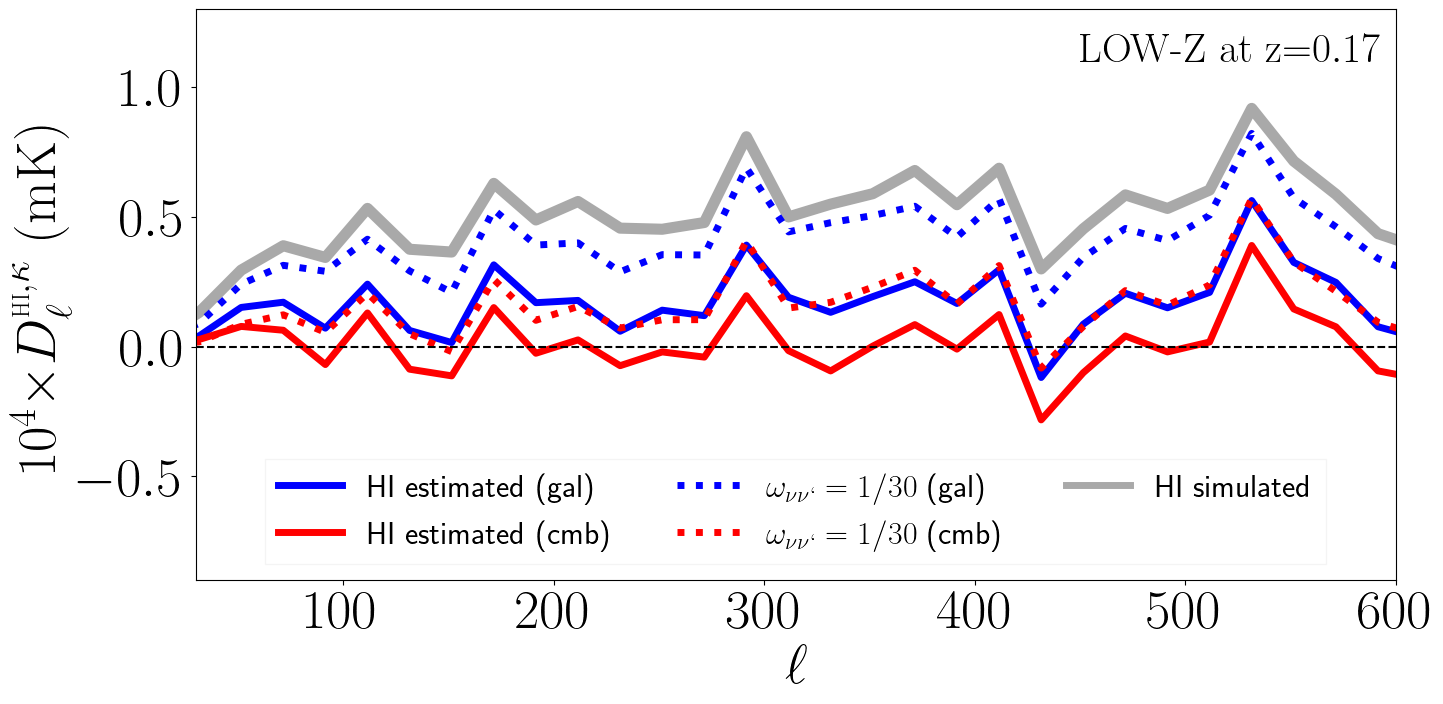

In [13]:
fig   = plt.figure()
grid  = plt.GridSpec(1,1,top=1.3,right=2)
ax    = plt.subplot(grid[0,0])
############################################################
savefigs = True
ins ='ns3'
numin,numax,nch = 980,1260,30
zeff     = cxft.get_zeff(numin =numin, numax =numax, nbands= nch, n_curves=nch)['zeff'][ich]
fact_exp = 4
fact     = 10**fact_exp
############################################################
ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_cmb[ins]['cl_cx_f1_f2_sim_sim'][ich]), c=my_cmap(0), lw=8)#, label='HI sim (cmb)')  
ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_gal[ins]['cl_cx_f1_f2_rec_sim'][ich]), c=my_cmap(1), lw=5, label='HI estimated (gal)')  
ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_cmb[ins]['cl_cx_f1_f2_rec_sim'][ich]), c=my_cmap(2), lw=5, label='HI estimated (cmb)')  

ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_gal[ins]['cl_cx_f1_f2_sim_sim'][ich]-np.sum(CLs_dict_gal[ins]['cl_cx_f1_f2_sim_sim'],axis=0)/nch) , c=my_cmap(3), lw=5, ls='dotted', label=r'$\omega_{\nu\nu`}=1/'+'{}$ (gal)')  
ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_cmb[ins]['cl_cx_f1_f2_sim_sim'][ich]-np.sum(CLs_dict_cmb[ins]['cl_cx_f1_f2_sim_sim'],axis=0)/nch) , c=my_cmap(4), lw=5, ls='dotted', label=r'$\omega_{\nu\nu`}=1/'+'{}$ (cmb)')  

ax.set_ylim(-0.6, 1.3); 
ax.set_xlim(30,600)
ax.set_yticks([-0.9, -0.5, 0, 0.5, 0.9])
ax.tick_params(axis='both', labelsize=40)
ax.set_ylabel(r'$10^{'+str(fact_exp)+'}$' + r'$\times D_{\ell}^{\LARGE{\textrm{HI}},\tiny{\kappa}}\ (\textrm{mK})$', fontsize=40)#($\kappa, \textrm{HI}$)')
ax.set_xlabel(r'$\ell$', fontsize=40)
ax.axhline(y=0, ls='dashed', color='black')
ax.set_yscale('linear'); ax.set_xscale('linear')
###########################################################
custom_lines = [Line2D([], [], color=my_cmap(0+1), linewidth=5, linestyle='solid'),
                Line2D([], [], color=my_cmap(0+4), linewidth=5, linestyle='solid'),
                Line2D([], [], color=my_cmap(0+1), linewidth=5, linestyle='dotted'),
                Line2D([], [], color=my_cmap(0+4), linewidth=5, linestyle='dotted'),
                Line2D([], [], color=my_cmap(0+0), linewidth=5, linestyle='solid'),               ]


ax.legend(custom_lines, [r'HI estimated (gal)', 
                         r'HI estimated (cmb)',
                         r'$\omega_{\nu\nu`}=1/'+'{}$ (gal)'.format(nch),
                         r'$\omega_{\nu\nu`}=1/'+'{}$ (cmb)'.format(nch),
                         r'HI simulated'], ncols=3,
         fontsize=23, loc='lower center',framealpha=0.2, fancybox=False)

ax.text(x=650-200, y=1.1,s=r'$\textrm{LOW-Z at z=}$'+r'${}$'.format(zeff), fontdict=font_dict)
###########################################################
pathname = '/data/AMARINS/CMBWLxHI-CODES/images/Dl_cross_lkg_{}_ch{}__{}_{}__all_part1.png'.format(prefix, ich, numin, numax)
#if savefigs: plt.savefig(pathname, dpi=100, bbox_inches='tight')
pathname

'/data/AMARINS/CMBWLxHI-CODES/images/Dl_cross_lkg_lowz_nch30_980_1260_nch25_30_ch25__980_1260__all_part2.png'

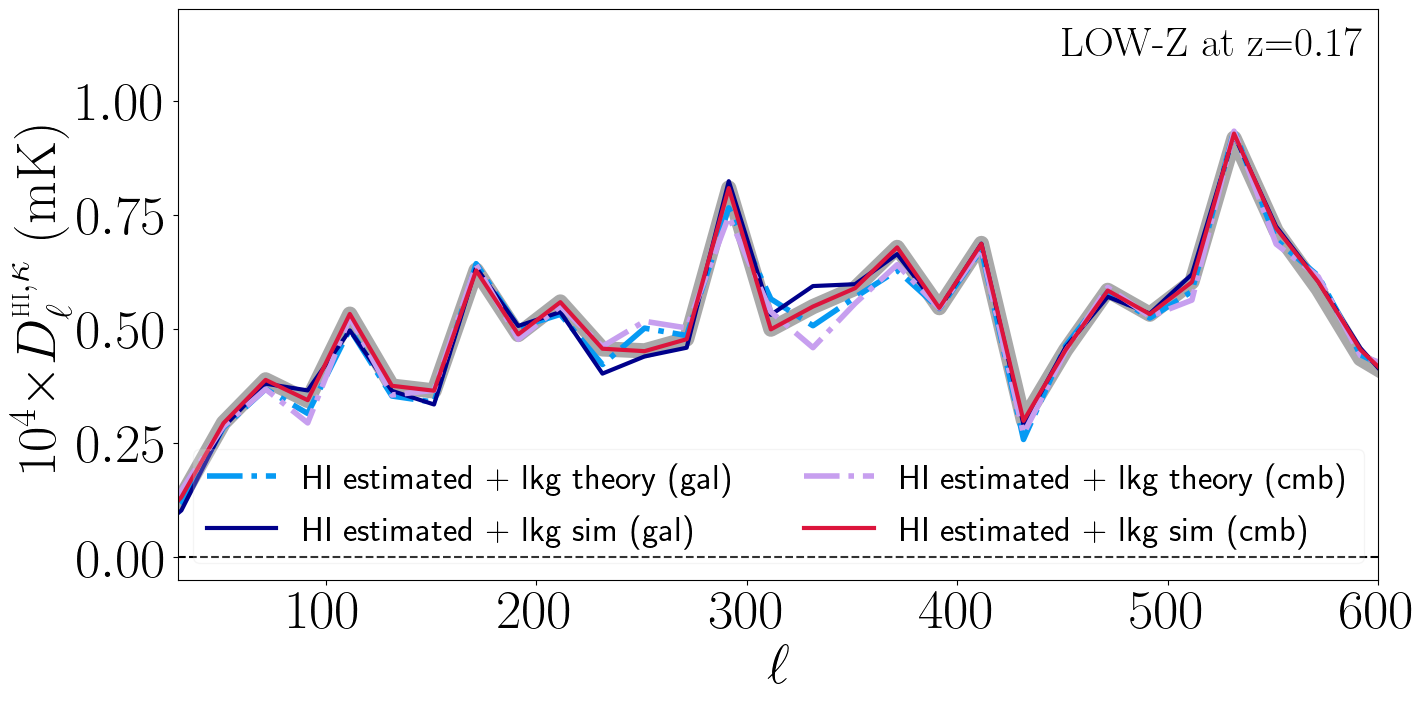

In [7]:
fig   = plt.figure()
grid  = plt.GridSpec(1,1,top=1.3,right=2)
ax    = plt.subplot(grid[0,0])
######Leakages######################################################
savefigs = True
ins ='ns3'
numin,numax,nch = 980,1260,30
zeff     = cxft.get_zeff(numin =numin, numax =numax, nbands= nch, n_curves=nch)['zeff'][ich]
fact_exp = 4
fact     = 10**fact_exp
############################################################
ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_cmb[ins]['cl_cx_f1_f2_sim_sim'][ich]), c=my_cmap(0), lw=11)#, label='HI sim (cmb)')  
#ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_gal[ins]['cl_cx_f1_f2_rec_sim'][ich]), c=my_cmap(0+1), lw=5, label='HI estimated (gal)')  
#ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_cmb[ins]['cl_cx_f1_f2_rec_sim'][ich]), c=my_cmap(0+4), lw=5, label='HI estimated (cmb)')  

ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_gal[ins]['cl_cx_f1_f2_rec_sim'][ich]+cx_lkg_th_gal[ich] ), c=my_cmap(5), lw=4, ls='-.'    ,  label='HI estimated + lkg theory (gal)')
ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_gal[ins]['cl_cx_f1_f2_rec_sim'][ich]+cx_lkg_sim_gal[ich]), c=my_cmap(6), lw=3, ls='solid',  label='HI estimated + lkg sim (gal)'   )
ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_cmb[ins]['cl_cx_f1_f2_rec_sim'][ich]+cx_lkg_th_cmb[ich] ), c=my_cmap(7), lw=4, ls='-.'    , label='HI estimated + lkg theory (cmb)')
ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_cmb[ins]['cl_cx_f1_f2_rec_sim'][ich]+cx_lkg_sim_cmb[ich]), c=my_cmap(8), lw=3, ls='solid', label='HI estimated + lkg sim (cmb)')
#ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_gal[ins]['cl_cx_f1_f2_sim_sim'][ich]-np.sum(CLs_dict_gal[ins]['cl_cx_f1_f2_sim_sim'],axis=0)/nch) , c=my_cmap(7), lw=3, ls='dotted', label=r'$\omega_{\nu\nu`}=1/'+'{}$ (gal)')  
#ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_cmb[ins]['cl_cx_f1_f2_sim_sim'][ich]-np.sum(CLs_dict_cmb[ins]['cl_cx_f1_f2_sim_sim'],axis=0)/nch) , c=my_cmap(7), lw=3, ls='dotted', label=r'$\omega_{\nu\nu`}=1/'+'{}$ (cmb)')  

ax.set_ylim(-0.05, 1.2); 
ax.set_xlim(30,600)
#ax.set_yticks([-0.9, -0.5, 0, 0.5, 0.9])
ax.text(x=650-200, y=1.1,s=r'$\textrm{LOW-Z at z=}$'+r'${}$'.format(zeff), fontdict=font_dict)
ax.tick_params(axis='both', labelsize=40)
ax.set_ylabel(r'$10^{'+str(fact_exp)+'}$' + r'$\times D_{\ell}^{\LARGE{\textrm{HI}},\tiny{\kappa}}\ (\textrm{mK})$', fontsize=40)#($\kappa, \textrm{HI}$)')
ax.set_xlabel(r'$\ell$', fontsize=40)#($\kappa, \textrm{HI}$)')
ax.axhline(y=0, ls='dashed', color='black')
ax.set_yscale('linear'); ax.set_xscale('linear')
#ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax.legend( fontsize=25, loc='lower center', ncols=2,framealpha=0.2)
#plt.savefig('/home/amarins/Dl_cross_lkg_{}_ch{}__{}_{}__all.png'.format(prefix, i, nu_min, nu_max), dpi=100, bbox_inches='tight')
#'/home/amarins/Dl_cross_lkg_{}_ch{}__{}_{}.png'.format(prefix, i, nu_min, nu_max)
pathname = '/data/AMARINS/CMBWLxHI-CODES/images/Dl_cross_lkg_{}_ch{}__{}_{}__all_part2.png'.format(prefix, ich, numin, numax)
if savefigs: plt.savefig(pathname, dpi=100, bbox_inches='tight')
pathname

'/data/AMARINS/CMBWLxHI-CODES/images/Dl_cross_lkg_lowz_nch30_980_1260_nch25_30_ch25__980_1260__all_cmb.png'

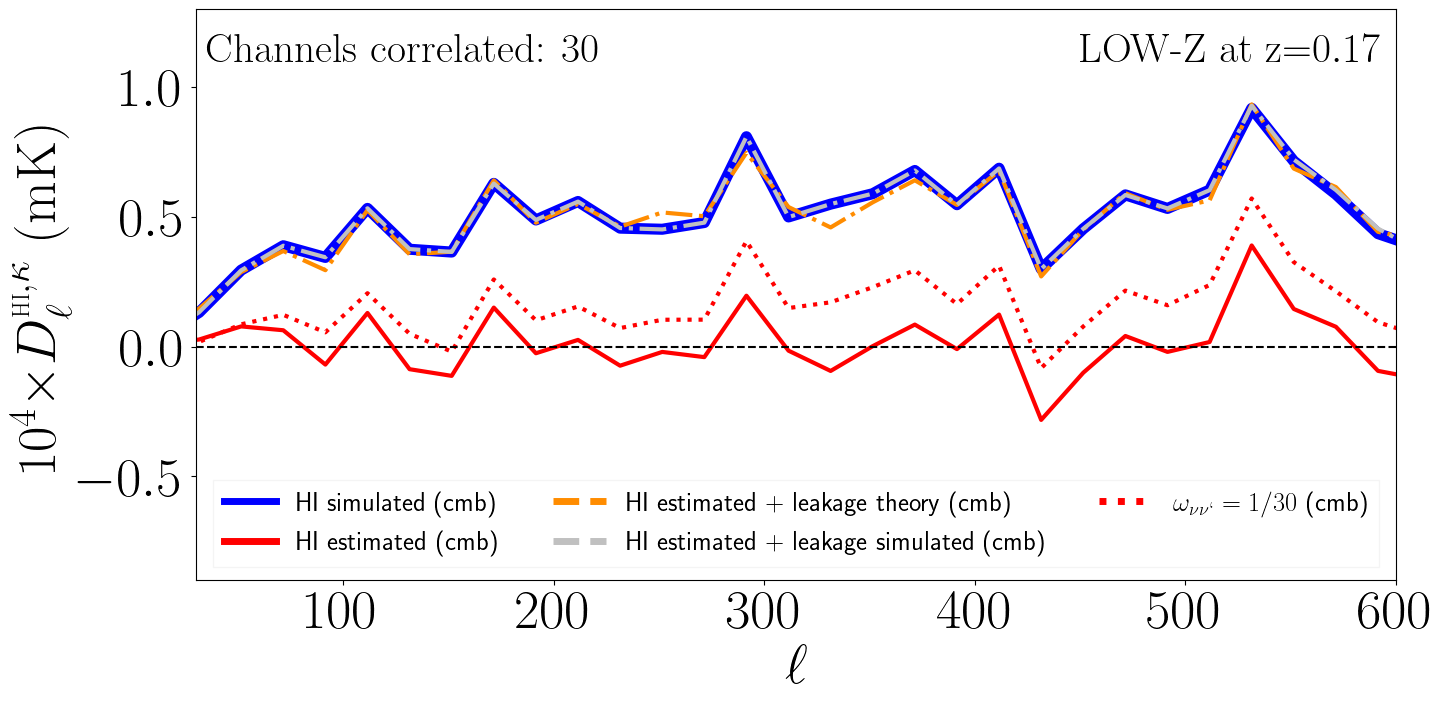

In [9]:
fig   = plt.figure()
grid  = plt.GridSpec(1,1,top=1.3,right=2)
ax    = plt.subplot(grid[0,0])
############################################################
savefigs = True
ins ='ns3'
numin,numax,nch = 980,1260,30
zeff     = cxft.get_zeff(numin =numin, numax =numax, nbands= nch, n_curves=nch)['zeff'][ich]
fact_exp = 4
fact     = 10**fact_exp
ncorr    = nch
############################################################
ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_cmb[ins]['cl_cx_f1_f2_sim_sim'][ich])                                                             , c=my_cmap(1), lw=8)#, label='HI sim (cmb)')  
ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_cmb[ins]['cl_cx_f1_f2_rec_sim'][ich])                                                             , c=my_cmap(2), lw=3)  
ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_cmb[ins]['cl_cx_f1_f2_rec_sim'][ich]+cx_lkg_th_cmb[ich] )                                         , c=my_cmap(11), lw=3, ls='-.'    )
ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_cmb[ins]['cl_cx_f1_f2_rec_sim'][ich]+cx_lkg_sim_cmb[ich])                                         , c=my_cmap(14), lw=3, ls='-.')
ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_cmb[ins]['cl_cx_f1_f2_sim_sim'][ich]-np.sum(CLs_dict_cmb[ins]['cl_cx_f1_f2_sim_sim'],axis=0)/nch) , c=my_cmap(2), lw=3, ls='dotted')  
ax.set_ylim(-0.6, 1.3); 
ax.set_xlim(30,600)
ax.set_yticks([-0.9, -0.5, 0, 0.5, 0.9])
ax.tick_params(axis='both', labelsize=40)
ax.set_ylabel(r'$10^{'+str(fact_exp)+'}$' + r'$\times D_{\ell}^{\LARGE{\textrm{HI}},\tiny{\kappa}}\ (\textrm{mK})$', fontsize=40)#($\kappa, \textrm{HI}$)')
ax.set_xlabel(r'$\ell$', fontsize=40)#($\kappa, \textrm{HI}$)')
ax.axhline(y=0, ls='dashed', color='black')
ax.set_yscale('linear'); ax.set_xscale('linear')
#ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
###########################################################
custom_lines = [Line2D([], [], color=my_cmap(1), linewidth=5, linestyle='solid'),
                Line2D([], [], color=my_cmap(2), linewidth=5, linestyle='solid'),
                Line2D([], [], color=my_cmap(11), linewidth=5, linestyle='dashed'),
                Line2D([], [], color=my_cmap(14), linewidth=5, linestyle='dashed'),
                Line2D([], [], color=my_cmap(2), linewidth=5, linestyle='dotted'),               ]


ax.legend(custom_lines, [r'HI simulated (cmb)', 
                         r'HI estimated (cmb)',
                         'HI estimated + leakage theory (cmb)',
                         'HI estimated + leakage simulated (cmb)',
                         r'$\omega_{\nu\nu`}=1/'+'{}$ (cmb)'.format(nch),], ncols=3,
         fontsize=19, loc='lower center',framealpha=0.2, fancybox=False)

ax.text(x=650-200, y=1.1,s=r'$\textrm{LOW-Z at z=}$'+r'${}$'.format(zeff), fontdict=font_dict)
ax.text(x=210-175, y=1.1, s=r'$\textrm{Channels correlated: } '+' {}$'.format(ncorr), fontdict=font_dict, size=30)
###########################################################
pathname = '/data/AMARINS/CMBWLxHI-CODES/images/Dl_cross_lkg_{}_ch{}__{}_{}__all_cmb.png'.format(prefix, ich, numin, numax)
if savefigs: plt.savefig(pathname, dpi=100, bbox_inches='tight')
pathname

'/data/AMARINS/CMBWLxHI-CODES/images/Dl_cross_lkg_lowz_nch30_980_1260_nch25_30_ch25__980_1260__all_gal.png'

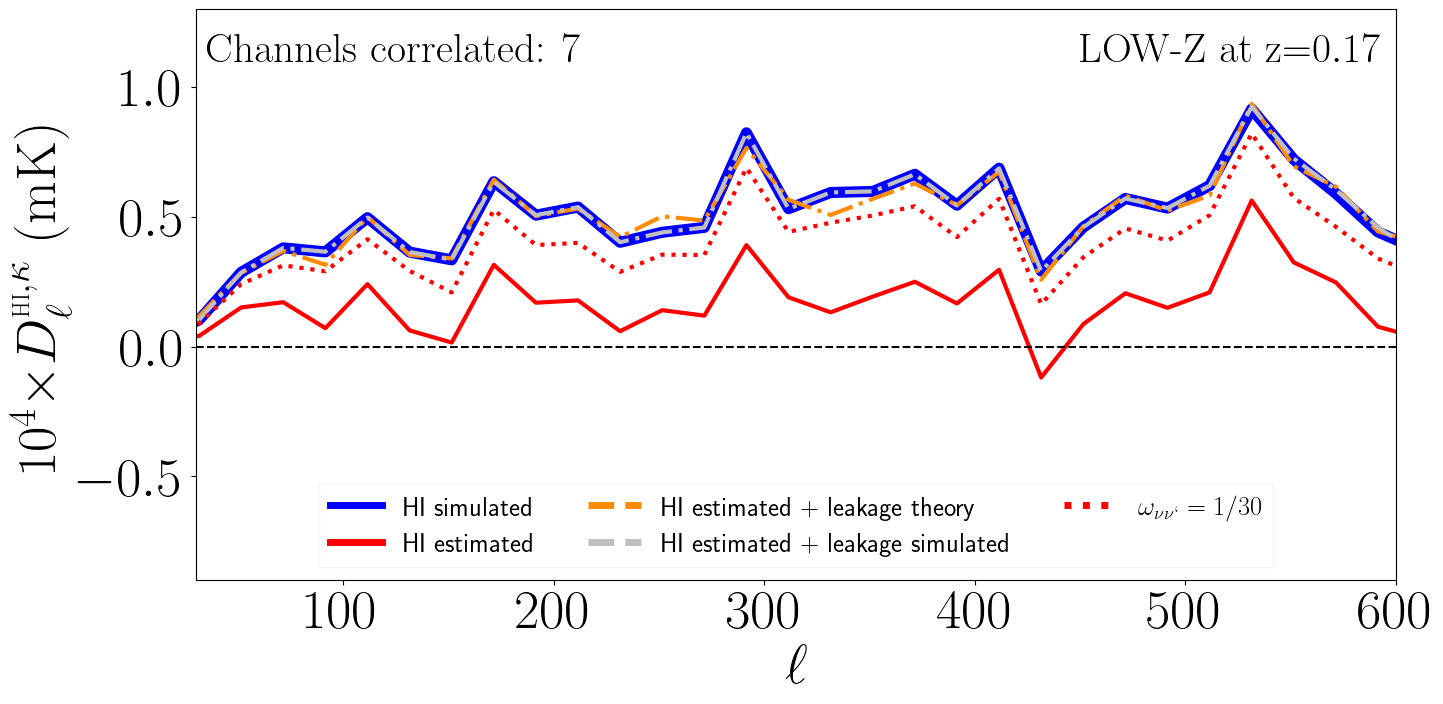

In [10]:
fig   = plt.figure()
grid  = plt.GridSpec(1,1,top=1.3,right=2)
ax    = plt.subplot(grid[0,0])
############################################################
savefigs = True
ins ='ns3'
numin,numax,nch = 980,1260,30
zeff     = cxft.get_zeff(numin =numin, numax =numax, nbands= nch, n_curves=nch)['zeff'][ich]
fact_exp = 4
fact     = 10**fact_exp
ncorr = 7
############################################################
ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_gal[ins]['cl_cx_f1_f2_sim_sim'][ich])                                                             , c=my_cmap(1), lw=8)#, label='HI sim (cmb)')  
ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_gal[ins]['cl_cx_f1_f2_rec_sim'][ich])                                                             , c=my_cmap(2), lw=3)  
ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_gal[ins]['cl_cx_f1_f2_rec_sim'][ich]+cx_lkg_th_gal[ich] )                                         , c=my_cmap(11), lw=3, ls='-.'    )
ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_gal[ins]['cl_cx_f1_f2_rec_sim'][ich]+cx_lkg_sim_gal[ich])                                         , c=my_cmap(14), lw=3, ls='-.')
ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_gal[ins]['cl_cx_f1_f2_sim_sim'][ich]-np.sum(CLs_dict_gal[ins]['cl_cx_f1_f2_sim_sim'],axis=0)/nch) , c=my_cmap(2), lw=3, ls='dotted')  
ax.set_ylim(-0.6, 1.3); 
ax.set_xlim(30,600)
ax.set_yticks([-0.9, -0.5, 0, 0.5, 0.9])
ax.tick_params(axis='both', labelsize=40)
ax.set_ylabel(r'$10^{'+str(fact_exp)+'}$' + r'$\times D_{\ell}^{\LARGE{\textrm{HI}},\tiny{\kappa}}\ (\textrm{mK})$', fontsize=40)#($\kappa, \textrm{HI}$)')
ax.set_xlabel(r'$\ell$', fontsize=40)#($\kappa, \textrm{HI}$)')
ax.axhline(y=0, ls='dashed', color='black')
ax.set_yscale('linear'); ax.set_xscale('linear')
#ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
###########################################################
custom_lines = [Line2D([], [], color=my_cmap(1), linewidth=5, linestyle='solid'),
                Line2D([], [], color=my_cmap(2), linewidth=5, linestyle='solid'),
                Line2D([], [], color=my_cmap(11), linewidth=5, linestyle='dashed'),
                Line2D([], [], color=my_cmap(14), linewidth=5, linestyle='dashed'),
                Line2D([], [], color=my_cmap(2), linewidth=5, linestyle='dotted'),               ]


ax.legend(custom_lines, [r'HI simulated', 
                         r'HI estimated',
                         'HI estimated + leakage theory',
                         'HI estimated + leakage simulated',
                         r'$\omega_{\nu\nu`}=1/'+'{}$'.format(nch),], ncols=3,
         fontsize=19, loc='lower center',framealpha=0.2, fancybox=False)

ax.text(x=650-200, y=1.1,s=r'$\textrm{LOW-Z at z=}$'+r'${}$'.format(zeff), fontdict=font_dict)
ax.text(x=210-175, y=1.1, s=r'$\textrm{Channels correlated: } '+' {}$'.format(ncorr), fontdict=font_dict, size=30)
###########################################################
pathname = '/data/AMARINS/CMBWLxHI-CODES/images/Dl_cross_lkg_{}_ch{}__{}_{}__all_gal.png'.format(prefix, ich, numin, numax)
if savefigs: plt.savefig(pathname, dpi=100, bbox_inches='tight')
pathname

'/data/AMARINS/CMBWLxHI-CODES/images/Dl_cross_lkg_lowz_nch30_980_1260_nch25_30_ch25__980_1260__all_together.png'

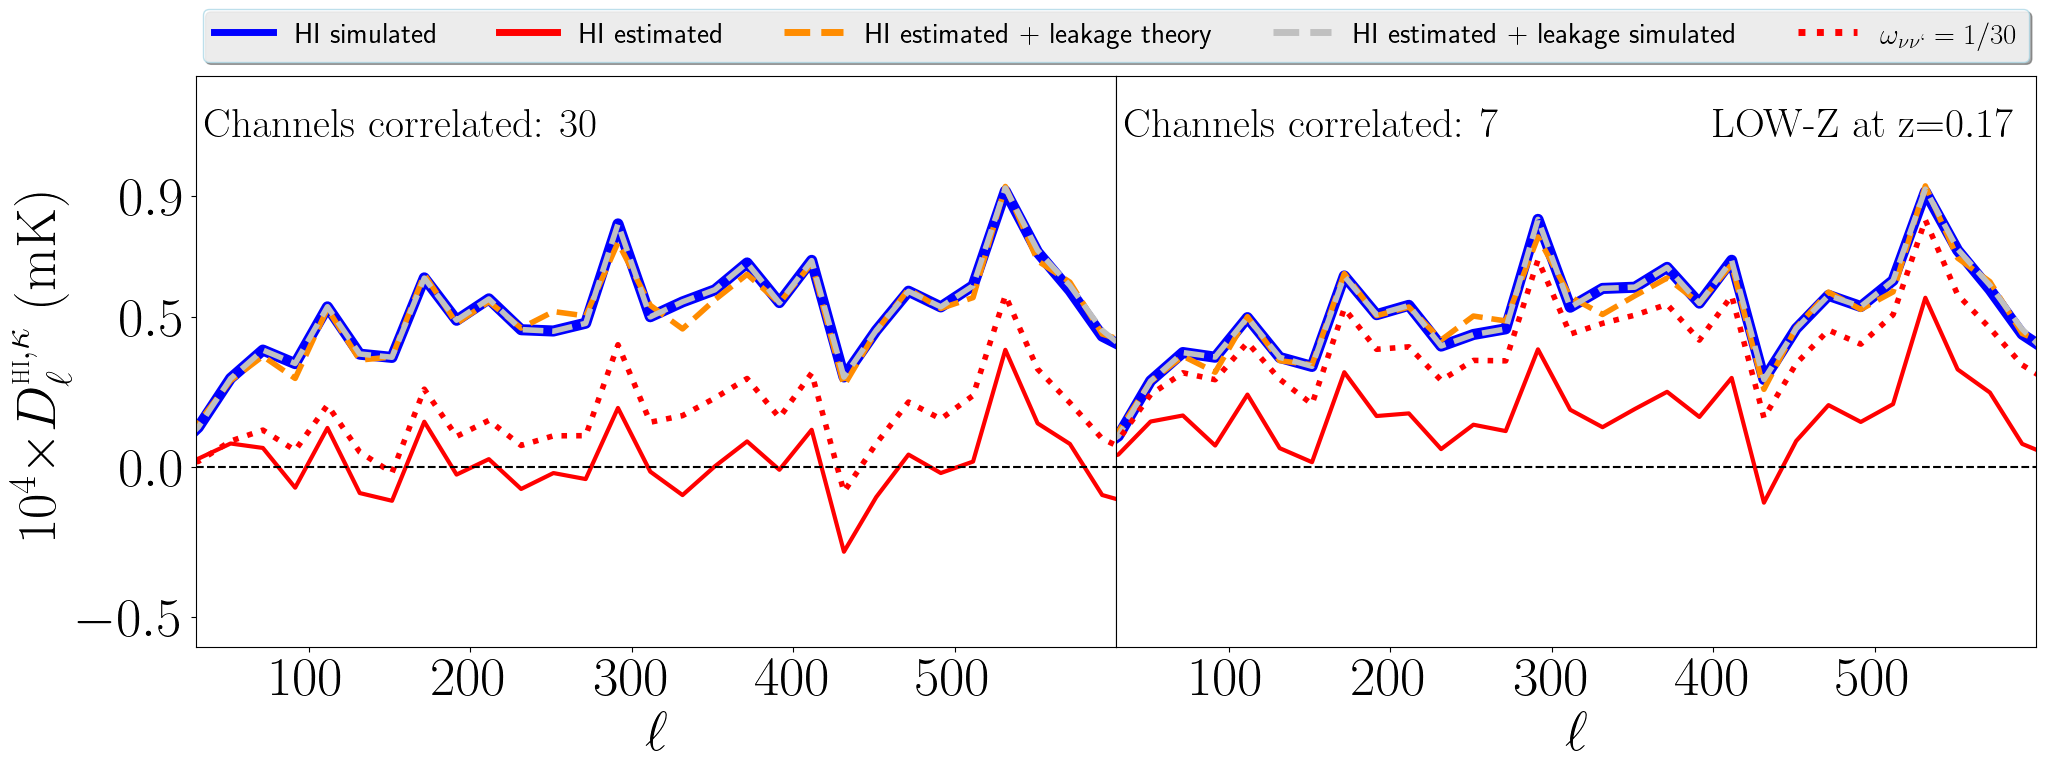

In [15]:
fig   = plt.figure()
grid  = plt.GridSpec(1,2,top=1.3,right=3, wspace=0)
############################################################
savefigs = True
ins ='ns3'
numin,numax,nch = 980,1260,30
zeff     = cxft.get_zeff(numin =numin, numax =numax, nbands= nch, n_curves=nch)['zeff'][ich]
fact_exp = 4
fact     = 10**fact_exp
ncorr=30
cyticks = [ -0.5, 0, 0.5, 0.9]
cxticks = [100,200,300,400,500]
############################################################
ax    = plt.subplot(grid[0,0])
ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_cmb[ins]['cl_cx_f1_f2_sim_sim'][ich])                                                             , c=my_cmap(1) , lw=8)#, label='HI sim (cmb)')  
ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_cmb[ins]['cl_cx_f1_f2_rec_sim'][ich])                                                             , c=my_cmap(2) , lw=3)  
ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_cmb[ins]['cl_cx_f1_f2_rec_sim'][ich]+cx_lkg_th_cmb[ich] )                                         , c=my_cmap(11), lw=4, ls='dashed'    )
ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_cmb[ins]['cl_cx_f1_f2_rec_sim'][ich]+cx_lkg_sim_cmb[ich])                                         , c=my_cmap(14), lw=4, ls='dashed')
ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_cmb[ins]['cl_cx_f1_f2_sim_sim'][ich]-np.sum(CLs_dict_cmb[ins]['cl_cx_f1_f2_sim_sim'],axis=0)/nch) , c=my_cmap(2) , lw=4, ls='dotted')  
ax.set_ylabel(r'$10^{'+str(fact_exp)+'}$' + r'$\times D_{\ell}^{\LARGE{\textrm{HI}},\tiny{\kappa}}\ (\textrm{mK})$', fontsize=40)#($\kappa, \textrm{HI}$)')
ax.set_xlabel(r'$\ell$', fontsize=40)#($\kappa, \textrm{HI}$)')
ax.set_yscale('linear'); ax.set_xscale('linear')
ax.set_ylim(-0.6, 1.3)
ax.set_xlim(30,600)
ax.set_yticks(cyticks)
ax.set_xticks(cxticks)
ax.tick_params(axis='both', labelsize=40)
ax.axhline(y=0, ls='dashed', color='black')
#ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
###########################################################
custom_lines = [Line2D([], [], color=my_cmap(1), linewidth=5, linestyle='solid'),
                Line2D([], [], color=my_cmap(2), linewidth=5, linestyle='solid'),
                Line2D([], [], color=my_cmap(11), linewidth=5, linestyle='dashed'),
                Line2D([], [], color=my_cmap(14), linewidth=5, linestyle='dashed'),
                Line2D([], [], color=my_cmap(2), linewidth=5, linestyle='dotted'),               ]


#ax.legend(custom_lines, #[r'HI simulated (cmb)', 
                         #r'HI estimated (cmb)',
                         #'HI estimated + leakage theory (cmb)',
                         #'HI estimated + leakage simulated (cmb)',
                         #r'$\omega_{\nu\nu`}=1/'+'{}$ (cmb)'.format(nch),], ncols=3,
#         fontsize=19, loc='lower right',framealpha=0.2, fancybox=False)

#ax.text(x=650-200, y=1.1,s=r'$\textrm{LOW-Z at z=}$'+r'${}$'.format(zeff), fontdict=font_dict)
ax.text(x=210-175, y=1.1, s=r'$\textrm{Channels correlated: } '+' {}$'.format(ncorr), fontdict=font_dict, size=30)
############################################################
ncorr=7
ax    = plt.subplot(grid[0,1])
ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_gal[ins]['cl_cx_f1_f2_sim_sim'][ich])                                                             , c=my_cmap(1) , lw=8)#, label='HI sim (cmb)')  
ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_gal[ins]['cl_cx_f1_f2_rec_sim'][ich])                                                             , c=my_cmap(2) , lw=3)  
ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_gal[ins]['cl_cx_f1_f2_rec_sim'][ich]+cx_lkg_th_gal[ich] )                                         , c=my_cmap(11), lw=4, ls='dashed'    )
ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_gal[ins]['cl_cx_f1_f2_rec_sim'][ich]+cx_lkg_sim_gal[ich])                                         , c=my_cmap(14), lw=4, ls='dashed')
ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_gal[ins]['cl_cx_f1_f2_sim_sim'][ich]-np.sum(CLs_dict_gal[ins]['cl_cx_f1_f2_sim_sim'],axis=0)/nch) , c=my_cmap(2) , lw=4, ls='dotted')  
ax.set_xlabel(r'$\ell$', fontsize=40)#($\kappa, \textrm{HI}$)')
ax.set_yscale('linear'); ax.set_xscale('linear')
ax.set_ylim(-0.6, 1.3)
ax.set_xlim(30,600)
ax.set_yticks(cyticks)
ax.set_xticks(cxticks)
ax.tick_params(axis='both', labelsize=40)
ax.axhline(y=0, ls='dashed', color='black')
ax.get_yaxis().set_visible(False)
#ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
###########################################################
custom_lines = [Line2D([], [], color=my_cmap(1), linewidth=5, linestyle='solid'),
                Line2D([], [], color=my_cmap(2), linewidth=5, linestyle='solid'),
                Line2D([], [], color=my_cmap(11), linewidth=5, linestyle='dashed'),
                Line2D([], [], color=my_cmap(14), linewidth=5, linestyle='dashed'),
                Line2D([], [], color=my_cmap(2), linewidth=5, linestyle='dotted'),               ]


ax.legend(custom_lines, [r'HI simulated', 
                         r'HI estimated',
                         'HI estimated + leakage theory',
                         'HI estimated + leakage simulated',
                         r'$\omega_{\nu\nu`}=1/'+'{}$'.format(nch),], ncols=5,
         fontsize=21, loc='lower center',framealpha=0.8, fancybox=True,
         bbox_to_anchor=(-0., 1.),  edgecolor='lightblue', shadow=True,)

ax.text(x=650-250, y=1.1,s=r'$\textrm{LOW-Z at z=}$'+r'${}$'.format(zeff), fontdict=font_dict)
ax.text(x=210-175, y=1.1, s=r'$\textrm{Channels correlated: } '+' {}$'.format(ncorr), fontdict=font_dict, size=30)
###########################################################
pathname = '/data/AMARINS/CMBWLxHI-CODES/images/Dl_cross_lkg_{}_ch{}__{}_{}__all_together.png'.format(prefix, ich, numin, numax)
if savefigs: plt.savefig(pathname, dpi=100, bbox_inches='tight')
pathname

# HIGH-Z

In [16]:
timej  = time.time() 
###
prefix = 'highz_nch70_350_1050'
dirpath_out = '/data/AMARINS/CMBWLxHI-DATA/postprocessed/fullsky/{}'.format(prefix)
for i,ICs in enumerate(['ns3','ns4','ns5']):   
    dirpath_out_ns = os.path.join(dirpath_out,ICs)
    dirpath_theory = os.path.join(dirpath_out_ns,'theory')
    dirpath_sims   = os.path.join(dirpath_out_ns,'simulations')
    dirpath_rec    = os.path.join(dirpath_out_ns,'estimated')
    dirpath_lkg    = os.path.join(dirpath_out_ns,'leakage')
    dirpath_cross  = os.path.join(dirpath_out_ns,'cross')
    dirpath_alpha  = os.path.join(dirpath_out_ns,'alpha')
    L0_dir         = "sim0"
    
    cl_cx_field1_field2_sim_sim = np.loadtxt(os.path.join(dirpath_sims,L0_dir,       'cl_cx_field1_field2_sim_sim.txt')).T[1:,:]
    cl_cx_field1_field2_rec_sim = np.loadtxt(os.path.join(dirpath_cross, L0_dir, 'cl_cx_field1_field2_rec_sim.txt')).T[1:,:]
    if not i:
        CLs_dict_cmb = {ICs: {'cl_cx_f1_f2_sim_sim':cl_cx_field1_field2_sim_sim,
                              'cl_cx_f1_f2_rec_sim':cl_cx_field1_field2_rec_sim}
                       }
    else:
        CLs_dict_cmb[ICs] = {'cl_cx_f1_f2_sim_sim':cl_cx_field1_field2_sim_sim,
                             'cl_cx_f1_f2_rec_sim':cl_cx_field1_field2_rec_sim
                             }  
    del cl_cx_field1_field2_sim_sim, cl_cx_field1_field2_rec_sim

################################################
prefix = 'highz_nch70_350_1050_nch65_70'
dirpath_out = '/data/AMARINS/CMBWLxHI-DATA/postprocessed/fullsky/{}'.format(prefix)
for i,ICs in enumerate(['ns3','ns4','ns5']):   
    dirpath_out_ns = os.path.join(dirpath_out,ICs)
    dirpath_theory = os.path.join(dirpath_out_ns,'theory')
    dirpath_sims   = os.path.join(dirpath_out_ns,'simulations')
    dirpath_rec    = os.path.join(dirpath_out_ns,'estimated')
    dirpath_lkg    = os.path.join(dirpath_out_ns,'leakage')
    dirpath_cross  = os.path.join(dirpath_out_ns,'cross')
    dirpath_alpha  = os.path.join(dirpath_out_ns,'alpha')
    L0_dir         = "sim0"
    
    cl_cx_field1_field2_sim_sim = np.loadtxt(os.path.join(dirpath_sims,L0_dir,       'cl_cx_field1_field2_sim_sim.txt')).T[1:,:]
    cl_cx_field1_field2_rec_sim = np.loadtxt(os.path.join(dirpath_cross, L0_dir, 'cl_cx_field1_field2_rec_sim.txt')).T[1:,:]
    if not i:
        CLs_dict_gal = {ICs: {'cl_cx_f1_f2_sim_sim':cl_cx_field1_field2_sim_sim,
                              'cl_cx_f1_f2_rec_sim':cl_cx_field1_field2_rec_sim}
                       }
    else:
        CLs_dict_gal[ICs] = {'cl_cx_f1_f2_sim_sim':cl_cx_field1_field2_sim_sim,
                             'cl_cx_f1_f2_rec_sim':cl_cx_field1_field2_rec_sim
                             }  
    del cl_cx_field1_field2_sim_sim, cl_cx_field1_field2_rec_sim

###
print('Processing time: {0:.4f} seg'.format(time.time()-timej))      

Processing time: 0.0495 seg


In [17]:
########
# CMB
nsims       = 5
ns          = 4
numin,numax= 0,69
prefix      = 'highz_nch70_350_1050'
dirpath_out = '/data/AMARINS/CMBWLxHI-DATA'
dirpath_th  = os.path.join(dirpath_out,'theoretical')
dirpath_sim = os.path.join(dirpath_out,'simulations',prefix)
dirpath_est = os.path.join(dirpath_out,'FGremoval', prefix, 'fullsky', 'ns{}'.format(ns))
##
clcx = np.loadtxt(os.path.join(dirpath_th, '{}_CMBWLxHI_cl_{}.txt'.format('highz', 'nch70_350_1050')   )).T[1:,:] 
nch = int(clcx.shape[0])
#######################################
sim_names = np.array([])
for j,jname in enumerate(os.listdir(dirpath_sim)):
    if 'sim' in jname: sim_names = np.hstack(( sim_names, jname ))        
sim_names = np.sort(sim_names)[:nsims]
#######################################
for j,jsim in enumerate(sim_names):
    alm_imag = np.loadtxt(os.path.join(dirpath_sim,jsim, 'alm_kappa_sim_imag.txt')).T[2]
    alm_real = np.loadtxt(os.path.join(dirpath_sim,jsim, 'alm_kappa_sim_real.txt')).T[2]
    _cx_     = np.loadtxt(os.path.join(dirpath_sim,jsim, 'cl_cross_sim.txt')).T[1:,:]
    alm_kp_sim = np.ascontiguousarray(np.array([complex(jreal,jcompl) for (jreal,jcompl) in zip(alm_real, alm_imag)]))
    del alm_imag, alm_real
    alm_f2_sim_matrix = alm_kp_sim if not j else np.vstack(( alm_f2_sim_matrix, alm_kp_sim ))
    if not j: 
        cx_f1f2_sim_sim_matrix_cmb = dcopy(_cx_.flatten())
    else:
        cx_f1f2_sim_sim_matrix_cmb = np.vstack(( cx_f1f2_sim_sim_matrix_cmb, dcopy(_cx_.flatten()) ))     
del alm_kp_sim,jsim,_cx_
#######################################
for j,jsim in enumerate(sim_names):
    dirpath_jrec = os.path.join(dirpath_est,jsim)
    for jname in os.listdir(dirpath_jrec):
        if 'extHI'     in jname: jhifilename = jname
        if 'mixmatrix' in jname: jmixname    = jname
    _mp_         = hdata.getmap(dirpath_=dirpath_jrec, filename_=jhifilename, healpix_readingformat=0, hdu=1)
    _alm_hi_rec_ = hp.map2alm(maps=_mp_, pol=False)
    _cx_         = np.vstack([hp.alm2cl(alms1=_alm_hi_rec_[jch], alms2=alm_f2_sim_matrix[1+0]) for jch in range(nch)])
    if not j: 
        cx_f1f2_rec_sim_matrix_cmb = dcopy(_cx_.flatten())
    else:
        cx_f1f2_rec_sim_matrix_cmb = np.vstack(( cx_f1f2_rec_sim_matrix_cmb, dcopy(_cx_.flatten()) ))    
del _alm_hi_rec_,_mp_,jsim,_cx_,alm_f2_sim_matrix      

In [18]:
########
# GAL
numin,numax,nch = 64,69,70
prefix      = 'highz_nch70_350_1050_nch65_70'
dirpath_out = '/data/AMARINS/CMBWLxHI-DATA'
dirpath_sim = os.path.join(dirpath_out,'simulations',prefix)
dirpath_est = os.path.join(dirpath_out,'FGremoval', prefix, 'fullsky', 'ns{}'.format(ns))

sim_names = np.array([])
for j,jname in enumerate(os.listdir(dirpath_sim)):
    if 'sim' in jname: sim_names = np.hstack(( sim_names, jname ))        
sim_names = np.sort(sim_names)[:nsims]

for j,jsim in enumerate(sim_names):
    alm_imag = np.loadtxt(os.path.join(dirpath_sim,jsim, 'alm_kappa_sim_imag.txt')).T[2]
    alm_real = np.loadtxt(os.path.join(dirpath_sim,jsim, 'alm_kappa_sim_real.txt')).T[2]
    _cx_     = np.loadtxt(os.path.join(dirpath_sim,jsim, 'cl_cross_sim.txt')).T[1:,:]
    alm_kp_sim = np.ascontiguousarray(np.array([complex(jreal,jcompl) for (jreal,jcompl) in zip(alm_real, alm_imag)]))
    del alm_imag, alm_real
    alm_f2_sim_matrix = alm_kp_sim if not j else np.vstack(( alm_f2_sim_matrix, alm_kp_sim ))
    if not j: 
        cx_f1f2_sim_sim_matrix_gal = dcopy(_cx_.flatten())
    else:
        cx_f1f2_sim_sim_matrix_gal = np.vstack(( cx_f1f2_sim_sim_matrix_gal, dcopy(_cx_.flatten()) ))     
del alm_kp_sim,jsim,_cx_

for j,jsim in enumerate(sim_names):
    dirpath_jrec = os.path.join(dirpath_est,jsim)
    for jname in os.listdir(dirpath_jrec):
        if 'extHI'     in jname: jhifilename = jname
        if 'mixmatrix' in jname: jmixname    = jname
    _mp_         = hdata.getmap(dirpath_=dirpath_jrec, filename_=jhifilename, healpix_readingformat=0, hdu=1)
    _alm_hi_rec_ = hp.map2alm(maps=_mp_, pol=False)
    _cx_         = np.vstack([hp.alm2cl(alms1=_alm_hi_rec_[jch], alms2=alm_f2_sim_matrix[1+0]) for jch in range(nch)])

    _A_ = hdata.getmap(dirpath_=dirpath_jrec, filename_=jmixname, healpix_readingformat=0 , hdu=1)
    _w_ = np.dot( np.linalg.inv(np.dot(_A_.T,_A_)), _A_.T)
    _w_ = np.dot(_A_,_w_) 
    
    if not j: 
        cx_f1f2_rec_sim_matrix_gal = dcopy(_cx_.flatten())
        filter_matrix = dcopy(_w_.flatten())
    else:
        cx_f1f2_rec_sim_matrix_gal = np.vstack(( cx_f1f2_rec_sim_matrix_gal, dcopy(_cx_.flatten()) ))    
        filter_matrix = np.vstack(( filter_matrix, dcopy(_w_.flatten()) ))    
del _alm_hi_rec_,_mp_,jsim,_cx_,alm_f2_sim_matrix      

In [19]:
ich =65
numin,numax,nch = 64,69,70
cx_f1f2_sim0_gal = cx_f1f2_sim_sim_matrix_gal[0].reshape(nch,-1)
cx_f1f2_rec0_gal = cx_f1f2_rec_sim_matrix_gal[0].reshape(nch,-1)
cx_f1f2_sim0_cmb = cx_f1f2_sim_sim_matrix_cmb[0].reshape(nch,-1)
cx_f1f2_rec0_cmb = cx_f1f2_rec_sim_matrix_cmb[0].reshape(nch,-1)

Wfg_sim0 = filter_matrix[0].reshape(nch,nch)
cx_lkg_th_gal  = np.zeros_like(cx_f1f2_sim0_gal)
cx_lkg_sim_gal = np.zeros_like(cx_f1f2_sim0_gal)
cx_lkg_th_cmb  = np.zeros_like(cx_f1f2_sim0_cmb)
cx_lkg_sim_cmb = np.zeros_like(cx_f1f2_sim0_cmb)
clcx_th = np.zeros_like(clcx)
clcx_th[numin:numax+1,:] = clcx[numin:numax+1,:]

for j in np.arange(0,nch,1):
    cx_lkg_th_gal[j]  = np.dot(Wfg_sim0[ich,:], clcx_th[:,:]) #if j==nu_min else np.vstack(( cl_cx_lkg_th, np.dot(Wfg_sim0[i,j:], clcx[j:,:]) ))
    cx_lkg_sim_gal[j] = np.dot(Wfg_sim0[ich,:], cx_f1f2_sim0_gal[:,:])# if not j else np.vstack(( cl_cx_lkg_sim, np.dot(Wfg_sim0[i,:], cl_cx_f1f2_sim0[:,:]) ))
    cx_lkg_th_cmb[j]  = np.dot(Wfg_sim0[ich,:], clcx[:,:])
    cx_lkg_sim_cmb[j] = np.dot(Wfg_sim0[ich,:], cx_f1f2_sim0_cmb[:,:])

'/data/AMARINS/CMBWLxHI-CODES/images/Dl_cross_lkg_highz_nch70_350_1050_nch65_70_ch65__350_1050__all_part1.png'

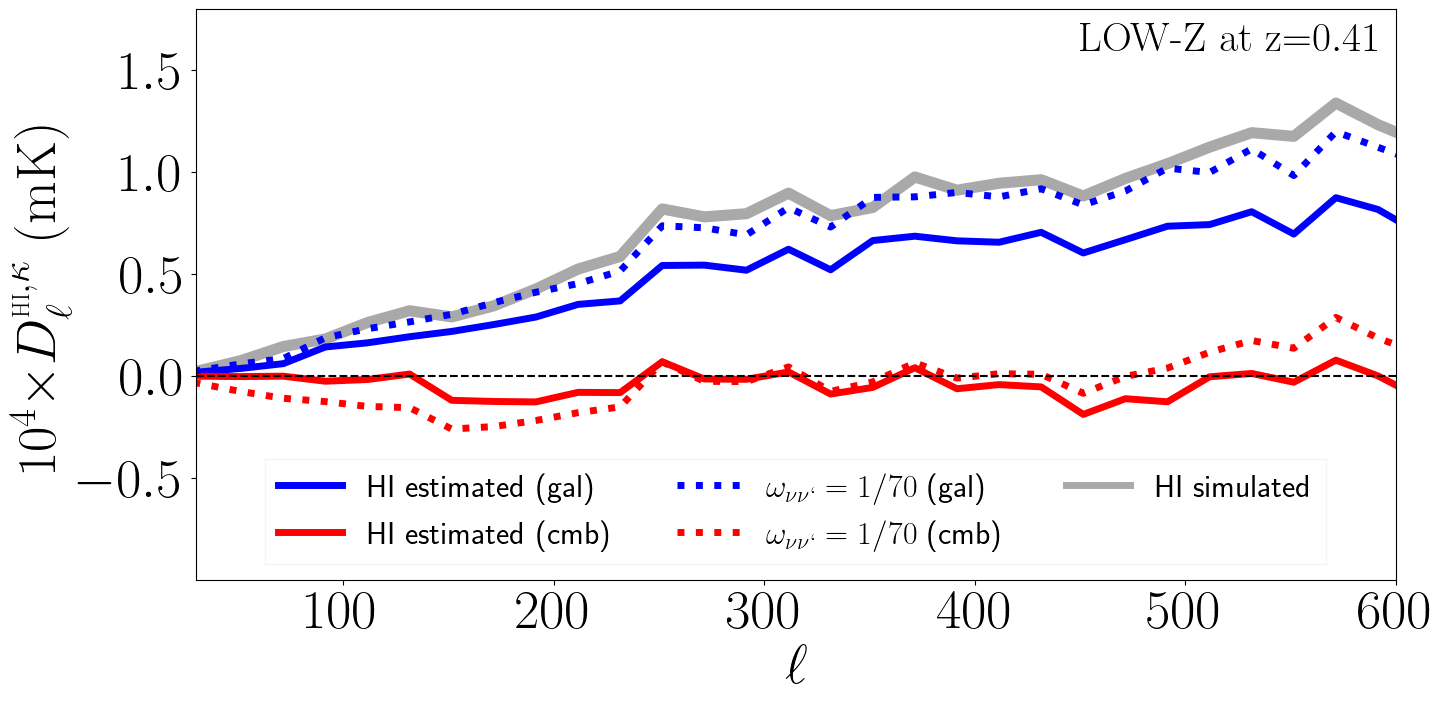

In [20]:
fig   = plt.figure()
grid  = plt.GridSpec(1,1,top=1.3,right=2)
ax    = plt.subplot(grid[0,0])
############################################################
savefigs = True
ins ='ns4'
numin,numax,nch = 350,1050,70
zeff     = cxft.get_zeff(numin =numin, numax =numax, nbands= nch, n_curves=nch)['zeff'][ich]
fact_exp = 4
fact     = 10**fact_exp
############################################################
ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_cmb[ins]['cl_cx_f1_f2_sim_sim'][ich]), c=my_cmap(0), lw=8)#, label='HI sim (cmb)')  
ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_gal[ins]['cl_cx_f1_f2_rec_sim'][ich]), c=my_cmap(1), lw=5, label='HI estimated (gal)')  
ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_cmb[ins]['cl_cx_f1_f2_rec_sim'][ich]), c=my_cmap(2), lw=5, label='HI estimated (cmb)')  

ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_gal[ins]['cl_cx_f1_f2_sim_sim'][ich]-np.sum(CLs_dict_gal[ins]['cl_cx_f1_f2_sim_sim'],axis=0)/nch) , c=my_cmap(3), lw=5, ls='dotted', label=r'$\omega_{\nu\nu`}=1/'+'{}$ (gal)')  
ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_cmb[ins]['cl_cx_f1_f2_sim_sim'][ich]-np.sum(CLs_dict_cmb[ins]['cl_cx_f1_f2_sim_sim'],axis=0)/nch) , c=my_cmap(4), lw=5, ls='dotted', label=r'$\omega_{\nu\nu`}=1/'+'{}$ (cmb)')  

ax.tick_params(axis='both', labelsize=40)
ax.set_ylabel(r'$10^{'+str(fact_exp)+'}$' + r'$\times D_{\ell}^{\LARGE{\textrm{HI}},\tiny{\kappa}}\ (\textrm{mK})$', fontsize=40)#($\kappa, \textrm{HI}$)')
ax.set_xlabel(r'$\ell$', fontsize=40)#($\kappa, \textrm{HI}$)')
ax.axhline(y=0, ls='dashed', color='black')
ax.set_yscale('linear'); ax.set_xscale('linear')
ax.set_ylim(-1, 1.8); 
ax.set_xlim(30,600)
ax.set_yticks([ -0.5, 0, 0.5, 1, 1.5])
#ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
###########################################################
custom_lines = [Line2D([], [], color=my_cmap(0+1), linewidth=5, linestyle='solid'),
                Line2D([], [], color=my_cmap(0+4), linewidth=5, linestyle='solid'),
                Line2D([], [], color=my_cmap(0+1), linewidth=5, linestyle='dotted'),
                Line2D([], [], color=my_cmap(0+4), linewidth=5, linestyle='dotted'),
                Line2D([], [], color=my_cmap(0+0), linewidth=5, linestyle='solid'),               ]


ax.legend(custom_lines, [r'HI estimated (gal)', 
                         r'HI estimated (cmb)',
                         r'$\omega_{\nu\nu`}=1/'+'{}$ (gal)'.format(nch),
                         r'$\omega_{\nu\nu`}=1/'+'{}$ (cmb)'.format(nch),
                         r'HI simulated'], ncols=3,
         fontsize=23, loc='lower center',framealpha=0.2, fancybox=False)

ax.text(x=650-200, y=1.6,s=r'$\textrm{LOW-Z at z=}$'+r'${}$'.format(zeff), fontdict=font_dict)
###########################################################
pathname = '/data/AMARINS/CMBWLxHI-CODES/images/Dl_cross_lkg_{}_ch{}__{}_{}__all_part1.png'.format(prefix, ich, numin, numax)
if savefigs: plt.savefig(pathname, dpi=100, bbox_inches='tight')
pathname

'/data/AMARINS/CMBWLxHI-CODES/images/Dl_cross_lkg_highz_nch70_350_1050_nch65_70_ch65__350_1050__all_part2.png'

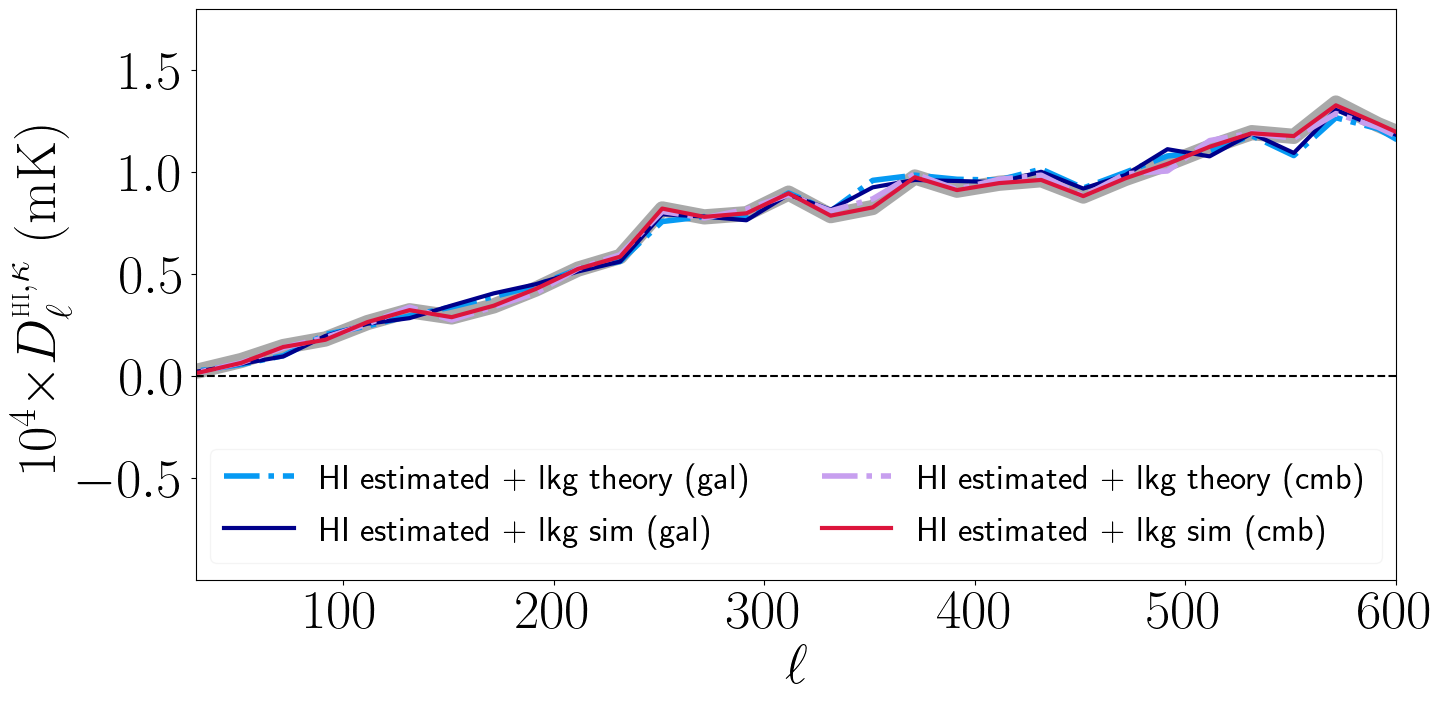

In [21]:
fig   = plt.figure()
grid  = plt.GridSpec(1,1,top=1.3,right=2)
ax    = plt.subplot(grid[0,0])
######Leakages######################################################
savefigs = True
ins ='ns4'
numin,numax,nch = 350,1050,70
zeff     = cxft.get_zeff(numin =numin, numax =numax, nbands= nch, n_curves=nch)['zeff'][ich]
fact_exp = 4
fact     = 10**fact_exp
############################################################
ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_cmb[ins]['cl_cx_f1_f2_sim_sim'][ich]), c=my_cmap(0), lw=11)

ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_gal[ins]['cl_cx_f1_f2_rec_sim'][ich]+cx_lkg_th_gal[ich] ), c=my_cmap(5), lw=4, ls='-.'    ,  label='HI estimated + lkg theory (gal)')
ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_gal[ins]['cl_cx_f1_f2_rec_sim'][ich]+cx_lkg_sim_gal[ich]), c=my_cmap(6), lw=3, ls='solid',  label='HI estimated + lkg sim (gal)'   )
ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_cmb[ins]['cl_cx_f1_f2_rec_sim'][ich]+cx_lkg_th_cmb[ich] ), c=my_cmap(7), lw=4, ls='-.'    , label='HI estimated + lkg theory (cmb)')
ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_cmb[ins]['cl_cx_f1_f2_rec_sim'][ich]+cx_lkg_sim_cmb[ich]), c=my_cmap(8), lw=3, ls='solid', label='HI estimated + lkg sim (cmb)')

ax.tick_params(axis='both', labelsize=40)
ax.set_ylabel(r'$10^{'+str(fact_exp)+'}$' + r'$\times D_{\ell}^{\LARGE{\textrm{HI}},\tiny{\kappa}}\ (\textrm{mK})$', fontsize=40)
ax.set_xlabel(r'$\ell$', fontsize=40)#($\kappa, \textrm{HI}$)')
ax.axhline(y=0, ls='dashed', color='black')
ax.set_yscale('linear'); ax.set_xscale('linear')
ax.set_ylim(-1, 1.8); 
ax.set_xlim(30,600)
ax.set_yticks([ -0.5, 0, 0.5, 1, 1.5])
ax.legend( fontsize=25, loc='lower center', ncols=2,framealpha=0.2)

pathname = '/data/AMARINS/CMBWLxHI-CODES/images/Dl_cross_lkg_{}_ch{}__{}_{}__all_part2.png'.format(prefix, ich, numin, numax)
if savefigs: plt.savefig(pathname, dpi=100, bbox_inches='tight')
pathname

'/data/AMARINS/CMBWLxHI-CODES/images/Dl_cross_lkg_highz_nch70_350_1050_nch65_70_ch65__350_1050__all_cmb.png'

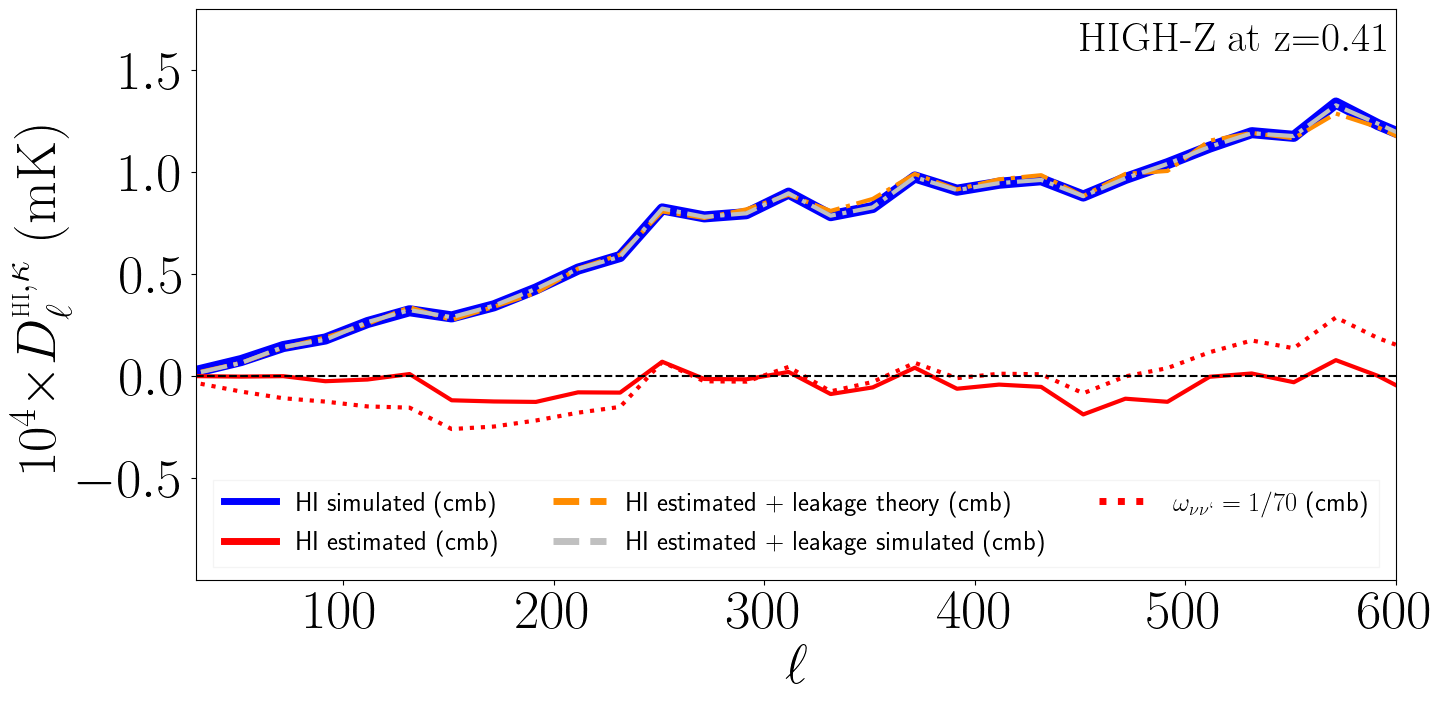

In [22]:
fig   = plt.figure()
grid  = plt.GridSpec(1,1,top=1.3,right=2)
ax    = plt.subplot(grid[0,0])
############################################################
savefigs = True
ins ='ns4'
numin,numax,nch = 350,1050,70
zeff     = cxft.get_zeff(numin =numin, numax =numax, nbands= nch, n_curves=nch)['zeff'][ich]
fact_exp = 4
fact     = 10**fact_exp
############################################################
ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_cmb[ins]['cl_cx_f1_f2_sim_sim'][ich])                                                             , c=my_cmap(1), lw=8)#, label='HI sim (cmb)')  
ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_cmb[ins]['cl_cx_f1_f2_rec_sim'][ich])                                                             , c=my_cmap(2), lw=3)  
ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_cmb[ins]['cl_cx_f1_f2_rec_sim'][ich]+cx_lkg_th_cmb[ich] )                                         , c=my_cmap(11), lw=3, ls='-.'    )
ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_cmb[ins]['cl_cx_f1_f2_rec_sim'][ich]+cx_lkg_sim_cmb[ich])                                         , c=my_cmap(14), lw=3, ls='-.')
ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_cmb[ins]['cl_cx_f1_f2_sim_sim'][ich]-np.sum(CLs_dict_cmb[ins]['cl_cx_f1_f2_sim_sim'],axis=0)/nch) , c=my_cmap(2), lw=3, ls='dotted')  
###########################################################
ax.tick_params(axis='both', labelsize=40)
ax.set_ylabel(r'$10^{'+str(fact_exp)+'}$' + r'$\times D_{\ell}^{\LARGE{\textrm{HI}},\tiny{\kappa}}\ (\textrm{mK})$', fontsize=40)#($\kappa, \textrm{HI}$)')
ax.set_xlabel(r'$\ell$', fontsize=40)#($\kappa, \textrm{HI}$)')
ax.axhline(y=0, ls='dashed', color='black')
ax.set_yscale('linear'); ax.set_xscale('linear')
ax.set_ylim(-1, 1.8); 
ax.set_xlim(30,600)
ax.set_yticks([ -0.5, 0, 0.5, 1, 1.5])
###########################################################
custom_lines = [Line2D([], [], color=my_cmap(1), linewidth=5, linestyle='solid'),
                Line2D([], [], color=my_cmap(2), linewidth=5, linestyle='solid'),
                Line2D([], [], color=my_cmap(11), linewidth=5, linestyle='dashed'),
                Line2D([], [], color=my_cmap(14), linewidth=5, linestyle='dashed'),
                Line2D([], [], color=my_cmap(2), linewidth=5, linestyle='dotted'),               ]


ax.legend(custom_lines, [r'HI simulated (cmb)', 
                         r'HI estimated (cmb)',
                         'HI estimated + leakage theory (cmb)',
                         'HI estimated + leakage simulated (cmb)',
                         r'$\omega_{\nu\nu`}=1/'+'{}$ (cmb)'.format(nch),], ncols=3,
         fontsize=19, loc='lower center',framealpha=0.2, fancybox=False)

ax.text(x=650-200, y=1.6,s=r'$\textrm{HIGH-Z at z=}$'+r'${}$'.format(zeff), fontdict=font_dict)
###########################################################
pathname = '/data/AMARINS/CMBWLxHI-CODES/images/Dl_cross_lkg_{}_ch{}__{}_{}__all_cmb.png'.format(prefix, ich, numin, numax)
if savefigs: plt.savefig(pathname, dpi=100, bbox_inches='tight')
pathname

'/data/AMARINS/CMBWLxHI-CODES/images/Dl_cross_lkg_highz_nch70_350_1050_nch65_70_ch65__350_1050__all_gal.png'

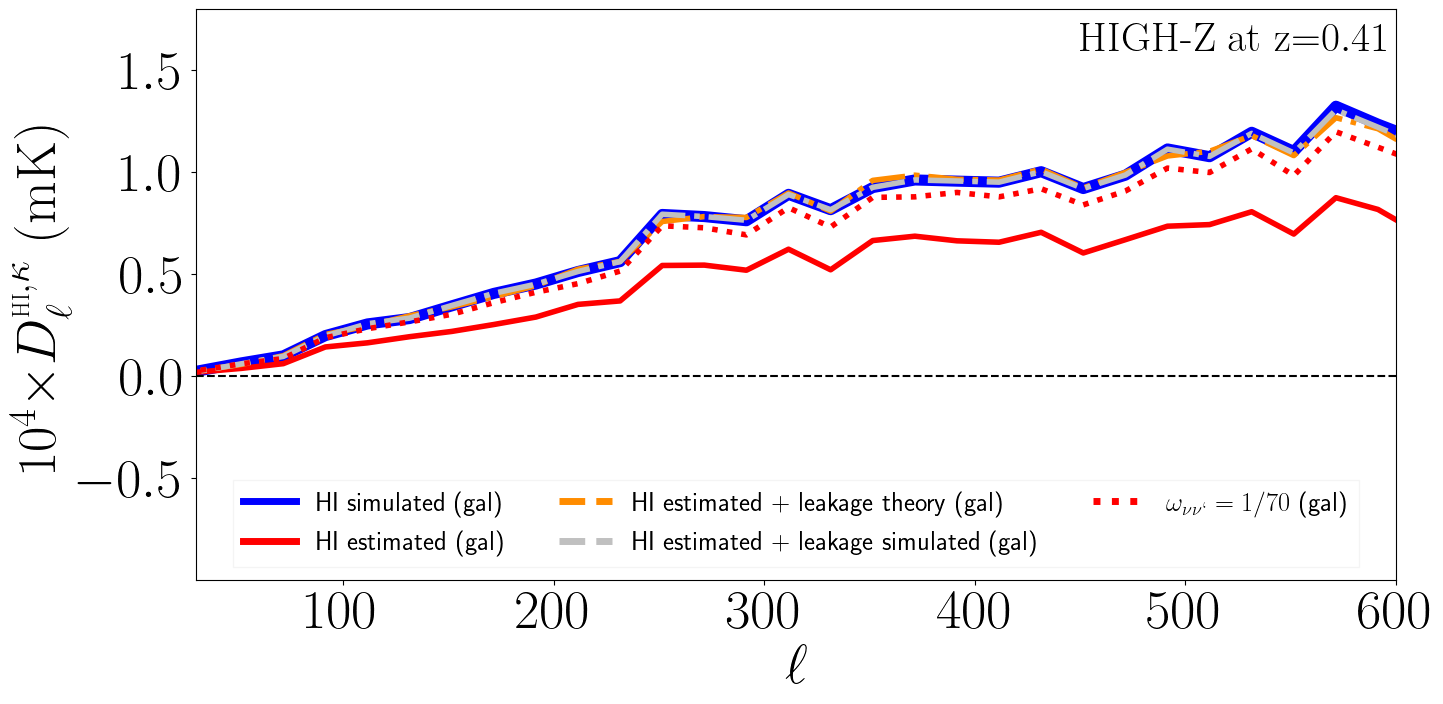

In [23]:
fig   = plt.figure()
grid  = plt.GridSpec(1,1,top=1.3,right=2)
ax    = plt.subplot(grid[0,0])
############################################################
savefigs = True
ins ='ns4'
numin,numax,nch = 350,1050,70
zeff     = cxft.get_zeff(numin =numin, numax =numax, nbands= nch, n_curves=nch)['zeff'][ich]
fact_exp = 4
fact     = 10**fact_exp
############################################################
ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_gal[ins]['cl_cx_f1_f2_sim_sim'][ich])                                                             , c=my_cmap(1) , lw=8)#, label='HI sim (cmb)')  
ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_gal[ins]['cl_cx_f1_f2_rec_sim'][ich])                                                             , c=my_cmap(2) , lw=4)  
ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_gal[ins]['cl_cx_f1_f2_rec_sim'][ich]+cx_lkg_th_gal[ich] )                                         , c=my_cmap(11), lw=4, ls='-.'    )
ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_gal[ins]['cl_cx_f1_f2_rec_sim'][ich]+cx_lkg_sim_gal[ich])                                         , c=my_cmap(14), lw=4, ls='-.')
ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_gal[ins]['cl_cx_f1_f2_sim_sim'][ich]-np.sum(CLs_dict_gal[ins]['cl_cx_f1_f2_sim_sim'],axis=0)/nch) , c=my_cmap(2) , lw=4, ls='dotted')  
###########################################################
ax.tick_params(axis='both', labelsize=40)
ax.set_ylabel(r'$10^{'+str(fact_exp)+'}$' + r'$\times D_{\ell}^{\LARGE{\textrm{HI}},\tiny{\kappa}}\ (\textrm{mK})$', fontsize=40)#($\kappa, \textrm{HI}$)')
ax.set_xlabel(r'$\ell$', fontsize=40)#($\kappa, \textrm{HI}$)')
ax.axhline(y=0, ls='dashed', color='black')
ax.set_yscale('linear'); ax.set_xscale('linear')
ax.set_ylim(-1, 1.8); 
ax.set_xlim(30,600)
ax.set_yticks([ -0.5, 0, 0.5, 1, 1.5])
###########################################################
custom_lines = [Line2D([], [], color=my_cmap(1), linewidth=5, linestyle='solid'),
                Line2D([], [], color=my_cmap(2), linewidth=5, linestyle='solid'),
                Line2D([], [], color=my_cmap(11), linewidth=5, linestyle='dashed'),
                Line2D([], [], color=my_cmap(14), linewidth=5, linestyle='dashed'),
                Line2D([], [], color=my_cmap(2), linewidth=5, linestyle='dotted'),               ]


ax.legend(custom_lines, [r'HI simulated (gal)', 
                         r'HI estimated (gal)',
                         'HI estimated + leakage theory (gal)',
                         'HI estimated + leakage simulated (gal)',
                         r'$\omega_{\nu\nu`}=1/'+'{}$ (gal)'.format(nch),], ncols=3,
         fontsize=19, loc='lower center',framealpha=0.2, fancybox=False)

ax.text(x=650-200, y=1.6,s=r'$\textrm{HIGH-Z at z=}$'+r'${}$'.format(zeff), fontdict=font_dict)
###########################################################
pathname = '/data/AMARINS/CMBWLxHI-CODES/images/Dl_cross_lkg_{}_ch{}__{}_{}__all_gal.png'.format(prefix, ich, numin, numax)
if savefigs: plt.savefig(pathname, dpi=100, bbox_inches='tight')
pathname

'/data/AMARINS/CMBWLxHI-CODES/images/Dl_cross_lkg_highz_nch70_350_1050_nch65_70_ch65__350_1050__all_together.png'

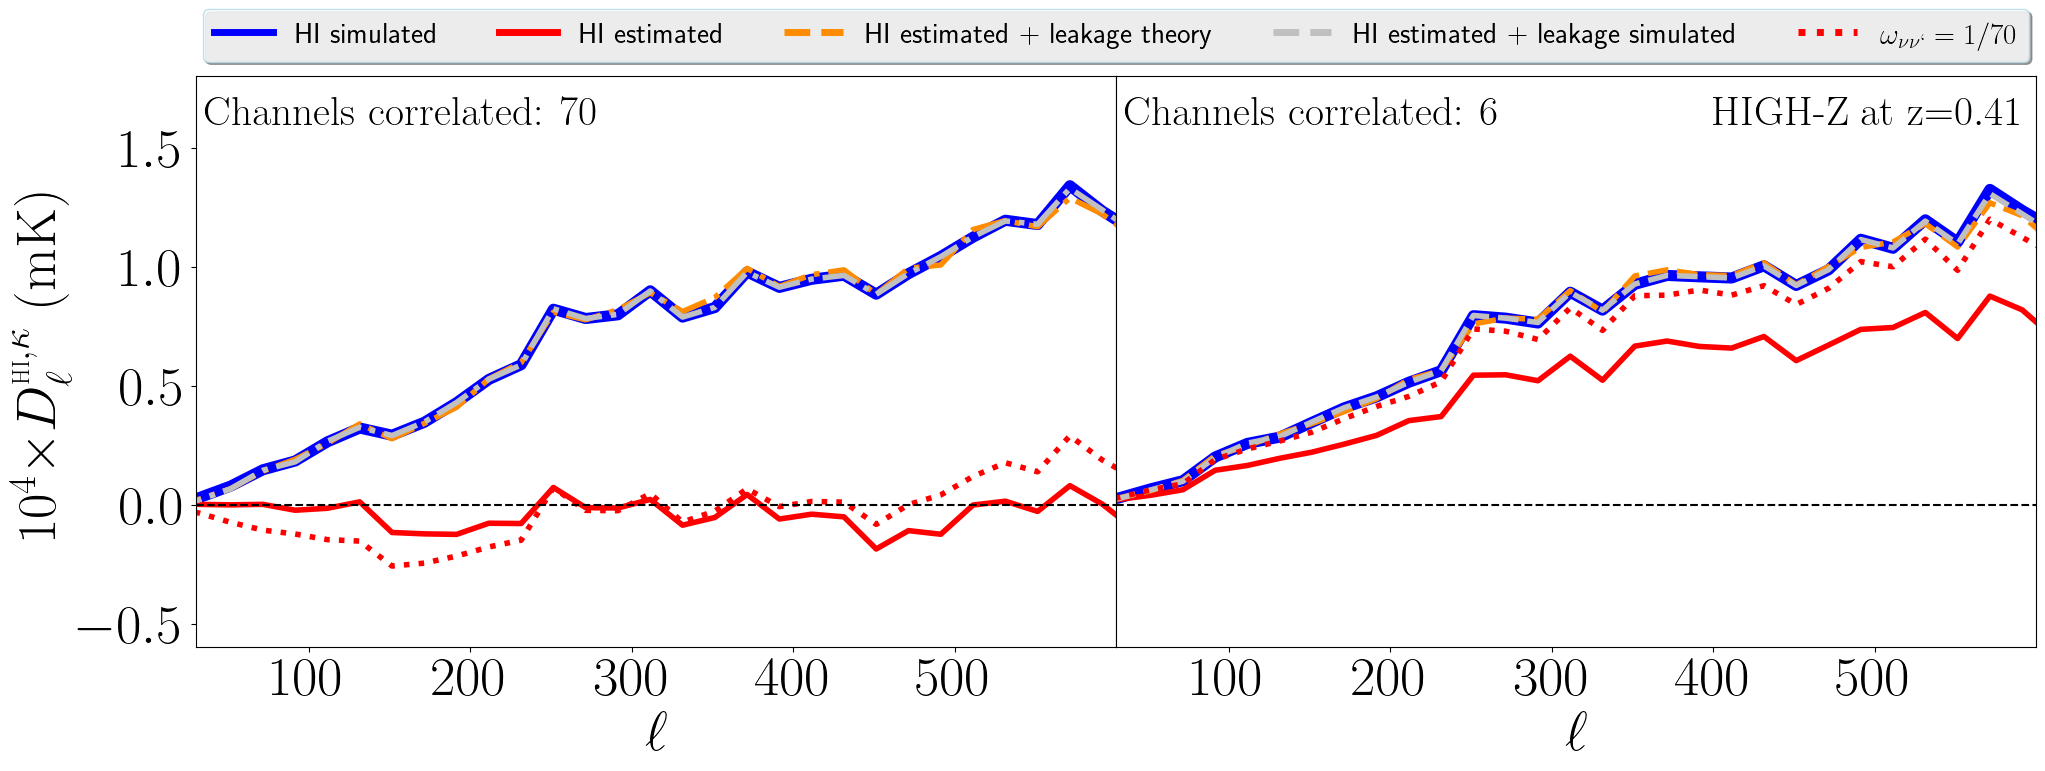

In [24]:
fig   = plt.figure()
grid  = plt.GridSpec(1,2,top=1.3,right=3, wspace=0)
############################################################
savefigs = True
ins ='ns4'
numin,numax,nch = 350,1050,70
zeff     = cxft.get_zeff(numin =numin, numax =numax, nbands= nch, n_curves=nch)['zeff'][ich]
fact_exp = 4
fact     = 10**fact_exp
ncorr   = 70
cyticks = [ -0.5, 0, 0.5, 1, 1.5]
cxticks = [100,200,300,400,500]
############################################################
ax    = plt.subplot(grid[0,0])
ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_cmb[ins]['cl_cx_f1_f2_sim_sim'][ich])                                                             , c=my_cmap(1) , lw=8)#, label='HI sim (cmb)')  
ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_cmb[ins]['cl_cx_f1_f2_rec_sim'][ich])                                                             , c=my_cmap(2) , lw=4)  
ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_cmb[ins]['cl_cx_f1_f2_rec_sim'][ich]+cx_lkg_th_cmb[ich] )                                         , c=my_cmap(11), lw=4, ls='-.'    )
ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_cmb[ins]['cl_cx_f1_f2_rec_sim'][ich]+cx_lkg_sim_cmb[ich])                                         , c=my_cmap(14), lw=4, ls='-.')
ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_cmb[ins]['cl_cx_f1_f2_sim_sim'][ich]-np.sum(CLs_dict_cmb[ins]['cl_cx_f1_f2_sim_sim'],axis=0)/nch) , c=my_cmap(2) , lw=4, ls='dotted')  
ax.set_ylabel(r'$10^{'+str(fact_exp)+'}$' + r'$\times D_{\ell}^{\LARGE{\textrm{HI}},\tiny{\kappa}}\ (\textrm{mK})$', fontsize=40)#($\kappa, \textrm{HI}$)')
ax.set_xlabel(r'$\ell$', fontsize=40)#($\kappa, \textrm{HI}$)')
ax.set_yscale('linear'); ax.set_xscale('linear')
ax.set_ylim(-0.6, 1.8)
ax.set_xlim(30,600)
ax.set_yticks(cyticks)
ax.set_xticks(cxticks)
ax.tick_params(axis='both', labelsize=40)
ax.axhline(y=0, ls='dashed', color='black')
#ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
###########################################################
custom_lines = [Line2D([], [], color=my_cmap(1), linewidth=5, linestyle='solid'),
                Line2D([], [], color=my_cmap(2), linewidth=5, linestyle='solid'),
                Line2D([], [], color=my_cmap(11), linewidth=5, linestyle='dashed'),
                Line2D([], [], color=my_cmap(14), linewidth=5, linestyle='dashed'),
                Line2D([], [], color=my_cmap(2), linewidth=5, linestyle='dotted')]
ax.text(x=210-175, y=1.6, s=r'$\textrm{Channels correlated: } '+' {}$'.format(ncorr), fontdict=font_dict, size=30)
############################################################
ncorr=6
ax    = plt.subplot(grid[0,1])
ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_gal[ins]['cl_cx_f1_f2_sim_sim'][ich])                                                             , c=my_cmap(1) , lw=8)#, label='HI sim (cmb)')  
ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_gal[ins]['cl_cx_f1_f2_rec_sim'][ich])                                                             , c=my_cmap(2) , lw=4)  
ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_gal[ins]['cl_cx_f1_f2_rec_sim'][ich]+cx_lkg_th_gal[ich] )                                         , c=my_cmap(11), lw=4, ls='dashed'    )
ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_gal[ins]['cl_cx_f1_f2_rec_sim'][ich]+cx_lkg_sim_gal[ich])                                         , c=my_cmap(14), lw=4, ls='dashed')
ax.plot(  leff, fact*feff*b.bin_cell(CLs_dict_gal[ins]['cl_cx_f1_f2_sim_sim'][ich]-np.sum(CLs_dict_gal[ins]['cl_cx_f1_f2_sim_sim'],axis=0)/nch) , c=my_cmap(2) , lw=4, ls='dotted')  
ax.set_xlabel(r'$\ell$', fontsize=40)#($\kappa, \textrm{HI}$)')
ax.set_yscale('linear'); ax.set_xscale('linear')
ax.set_ylim(-0.6, 1.8)
ax.set_xlim(30,600)
ax.set_yticks(cyticks)
ax.set_xticks(cxticks)
ax.tick_params(axis='both', labelsize=40)
ax.axhline(y=0, ls='dashed', color='black')
ax.get_yaxis().set_visible(False)
#ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
###########################################################
custom_lines = [Line2D([], [], color=my_cmap(1), linewidth=5, linestyle='solid'),
                Line2D([], [], color=my_cmap(2), linewidth=5, linestyle='solid'),
                Line2D([], [], color=my_cmap(11), linewidth=5, linestyle='dashed'),
                Line2D([], [], color=my_cmap(14), linewidth=5, linestyle='dashed'),
                Line2D([], [], color=my_cmap(2), linewidth=5, linestyle='dotted'),               ]


ax.legend(custom_lines, [r'HI simulated', 
                         r'HI estimated',
                         'HI estimated + leakage theory',
                         'HI estimated + leakage simulated',
                         r'$\omega_{\nu\nu`}=1/'+'{}$'.format(nch),], ncols=5,
         fontsize=21, loc='lower center',framealpha=0.8, fancybox=True,
         bbox_to_anchor=(-0., 1.),  edgecolor='lightblue', shadow=True,)

ax.text(x=650-250, y=1.6,s=r'$\textrm{HIGH-Z at z=}$'+r'${}$'.format(zeff), fontdict=font_dict)
ax.text(x=210-175, y=1.6, s=r'$\textrm{Channels correlated: } '+' {}$'.format(ncorr), fontdict=font_dict, size=30)
###########################################################
pathname = '/data/AMARINS/CMBWLxHI-CODES/images/Dl_cross_lkg_{}_ch{}__{}_{}__all_together.png'.format(prefix, ich, numin, numax)
if savefigs: plt.savefig(pathname, dpi=100, bbox_inches='tight')
pathname